# LOGISTIC REGRESSION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cust_filepath=(r'C:\Users\ansht\Downloads\Social_Network_Ads (1).csv')
cust_df=pd.read_csv(cust_filepath)


In [3]:
print(cust_df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [4]:
cust_df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#to get the information about the dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# Checking if any null values present or not
cust_df.isnull()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


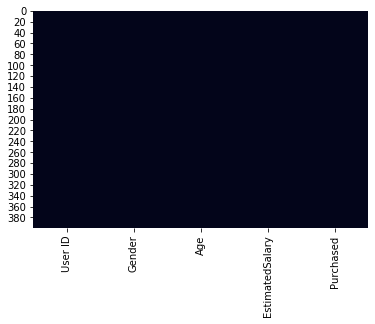

In [7]:
#Another way to check null values
sns.heatmap(cust_df.isnull(), cbar=False)


In [8]:
#Selecting a particular column through slicing
df1=cust_df.iloc[:,2:]

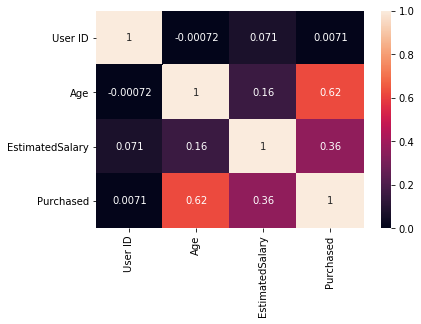

In [9]:
sns.heatmap(cust_df.corr(),vmin=0,vmax=1,annot=True)

In [10]:
print(df1)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [11]:
#Count the number of Male and Female
cust_df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [12]:
#Predicting whether the customer will purchase(0) or not(1)
X_features=list(cust_df.columns)

In [13]:
X_features.remove('Purchased')
X_features

['User ID', 'Gender', 'Age', 'EstimatedSalary']

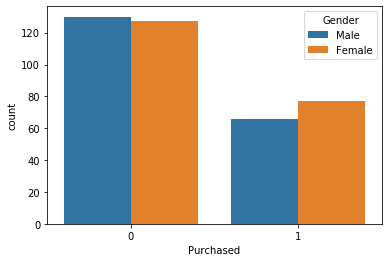

In [14]:
#Predicting that how many male and female purchased the Product based on gender
sns.countplot(x='Purchased',hue='Gender',data=cust_df)

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

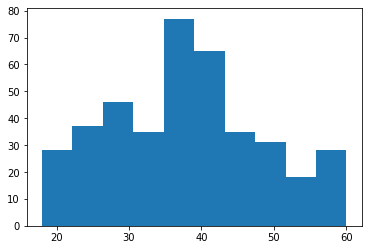

In [15]:
#Predicting the age of all the people through histogram as well as countplot
plt.hist(cust_df['Age'])
cust_df.Age.value_counts()

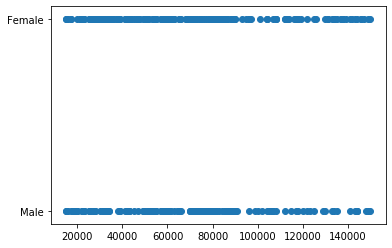

In [16]:
plt.scatter(x='EstimatedSalary',y='Gender',data=cust_df)



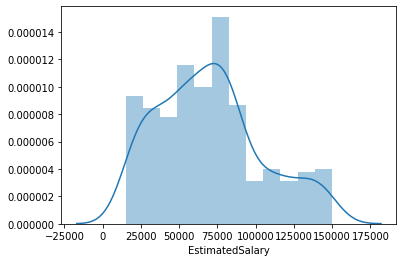

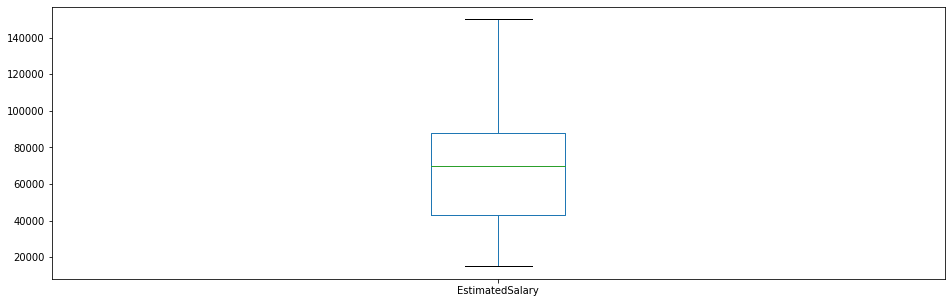

In [19]:
sns.distplot(cust_df['EstimatedSalary'])
plt.show()
cust_df['EstimatedSalary'].plot.box(figsize=(16,5))
plt.show()

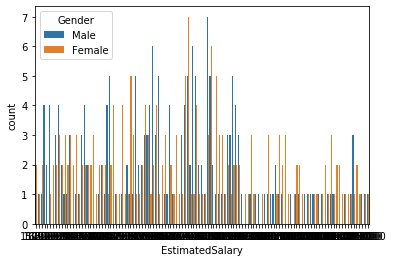

In [18]:
sns.countplot(x='EstimatedSalary',hue='Gender',data=cust_df)

# Building a Regression Model

# ENCODING CATEGORIAL DATA AND HANDLING USING DUMMY VARIABLES

In [162]:
#This is called multicollinearity and it significantly reduces the predictive power of your algorithm. To remove this, we can add the argument drop_first = True to the get_dummies method like this:
cust_df['Gender'].replace('Male',0,inplace=True)
cust_df['Gender'].replace('Female',1,inplace=True)

# HANDLING MISSING VALUES

In [163]:
#As of now no missing values are being found in the dataset so no missing values
cust_df.drop(['User ID'], axis = 1, inplace = True)

# SPLITING INTO TRAINING AND TESTING

In [164]:
cust_df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# FEATURE SCALING 

In [165]:
from sklearn.model_selection import train_test_split
x=cust_df[['Gender','Age','EstimatedSalary']]
y=cust_df['Purchased']

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [169]:
#here feature scaling is necessary as we won't be able to predict the correct data as the Salary category will dominate 
from sklearn.preprocessing import StandardScaler
modelx=StandardScaler()
x_train =modelx.fit_transform(x_train) 
x_test =modelx.fit_transform(x_test)

# MODELBUILDING

In [170]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# PREDICTIONS

In [182]:
predictions = model.predict(x_test)


# PERFORMANCE AND ACCURACY

In [183]:
from sklearn.metrics import confusion_matrix,accuracy_score
classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           0       0.85      0.91      0.88        78\n           1       0.81      0.69      0.74        42\n\n    accuracy                           0.83       120\n   macro avg       0.83      0.80      0.81       120\nweighted avg       0.83      0.83      0.83       120\n'

# CONFUSION MATRIX

In [184]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[71  7]
 [13 29]]


In [185]:
print(classification_report(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print(cm)
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        78
           1       0.81      0.69      0.74        42

    accuracy                           0.83       120
   macro avg       0.83      0.80      0.81       120
weighted avg       0.83      0.83      0.83       120

[[71  7]
 [13 29]]
0.8333333333333334
